In [2]:
%run tools.py
import scipy.stats

### Admixture analyses

In [3]:
df_sample_sets = pd.read_csv("../resources/manifest.tsv", sep="\t")
df_sample_sets

,sample_set,sample_count
0,1191-VO-MULTI-OLOUGHLIN-VMF00106,237
1,1191-VO-MULTI-OLOUGHLIN-VMF00140,1095
2,1244-VO-GH-YAWSON-VMF00149,485


#### Load data

In [4]:
sample_set = "1244-VO-GH-YAWSON-VMF00149"
chroms = ['2L', '2R', '3L', '3R', 'X']

In [5]:
snps = {}
pos = {}

for chrom in chroms:
    
    snps[chrom], pos[chrom], metadata = load_arrays_and_metadata("../resources", sample_set, chrom)
    
metadata['location2'] = metadata['location'].str.split(".").str.get(0)

#### Calculate Pattersons F2 and Fst in windows, between gambiae and coluzzii

/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/allel/stats/admixture.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = (ac[:, 0] * ac[:, 1]) / (an * (an - 1))


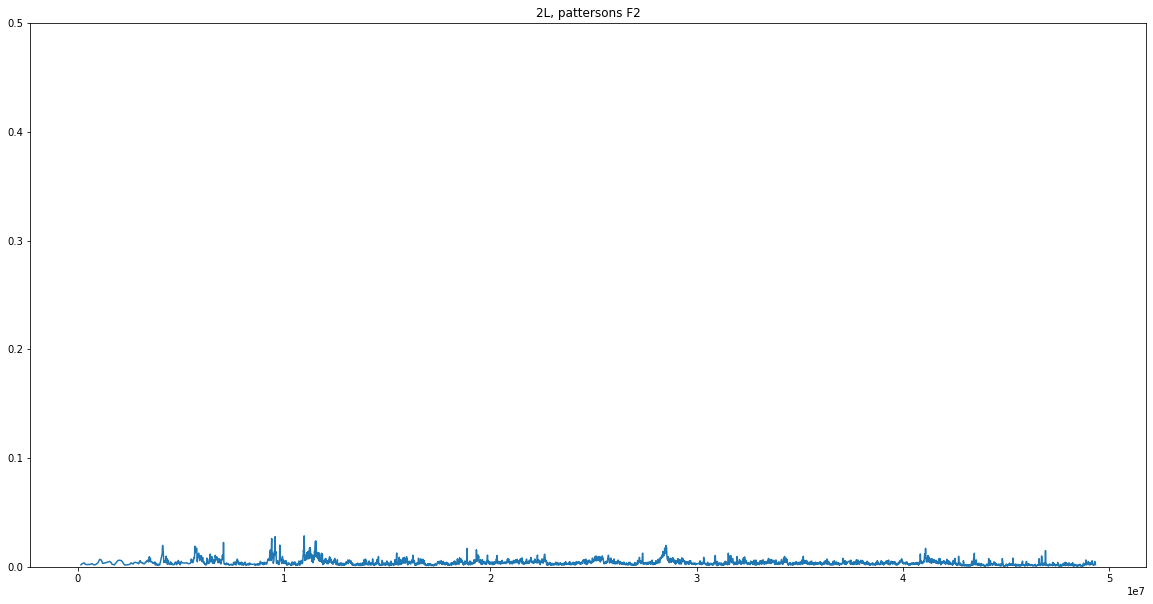

/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/allel/stats/admixture.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = (ac[:, 0] * ac[:, 1]) / (an * (an - 1))


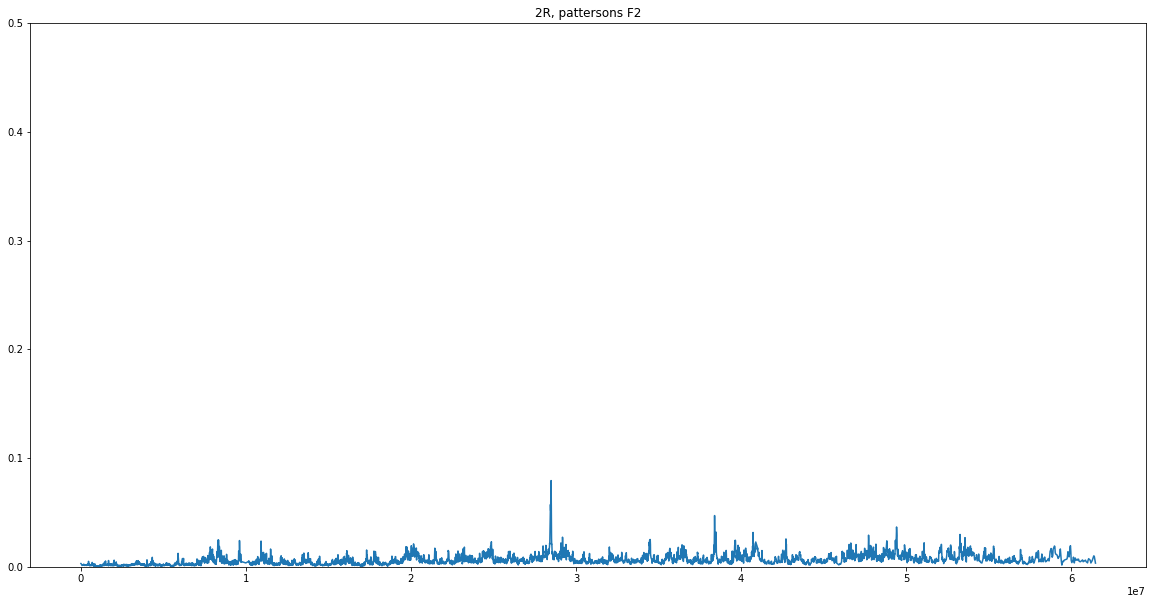

/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/allel/stats/admixture.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = (ac[:, 0] * ac[:, 1]) / (an * (an - 1))


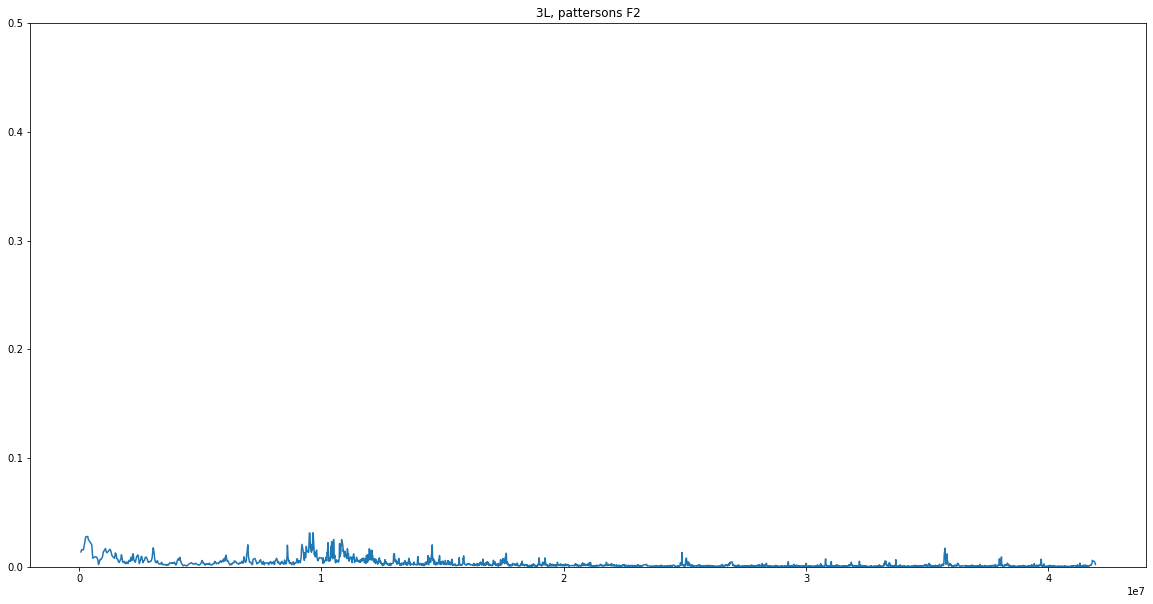

/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/allel/stats/admixture.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = (ac[:, 0] * ac[:, 1]) / (an * (an - 1))


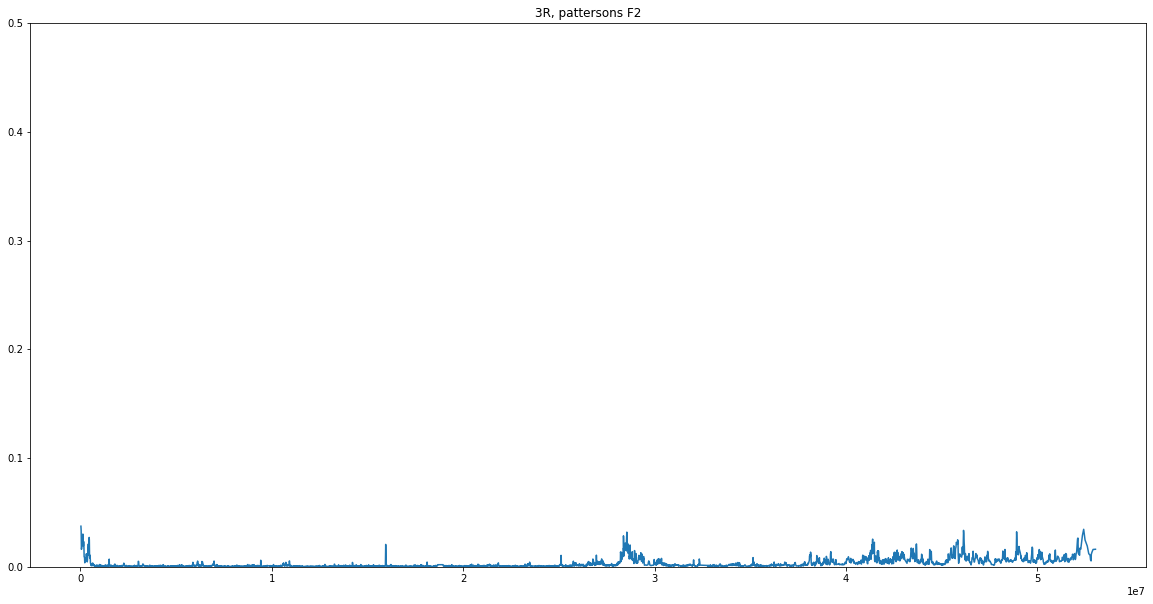

/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/allel/stats/admixture.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = (ac[:, 0] * ac[:, 1]) / (an * (an - 1))


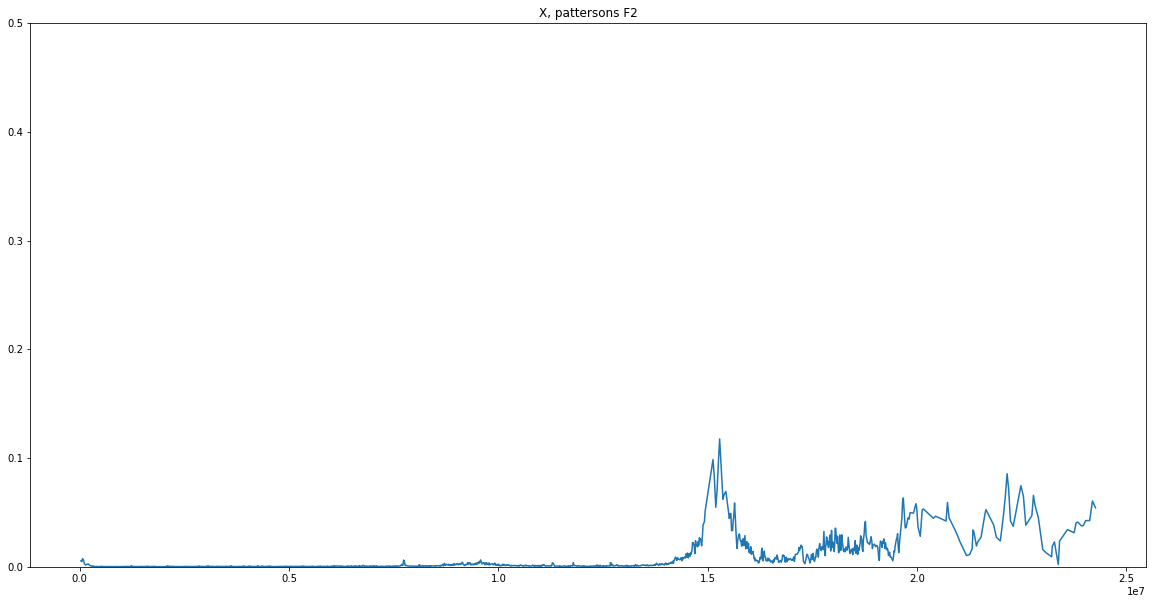

In [72]:
metadata.species_gambiae_coluzzii.value_counts()

coluzzii_bool = metadata.species_gambiae_coluzzii == 'coluzzii'
gambiae_bool = metadata.species_gambiae_coluzzii == 'gambiae'


for chrom in chroms:

    seg = snps[chrom].count_alleles().is_biallelic_01()
    geno = snps[chrom].compress(seg, axis=0)
    pos1 = pos[chrom][seg]

    gambiae_ac = geno.compress(gambiae_bool, axis=1).count_alleles()
    coluzzii_ac = geno.compress(coluzzii_bool, axis=1).count_alleles()

    f2 = allel.patterson_f2(aca=gambiae_ac, acb=coluzzii_ac)

    f2 = allel.moving_statistic(values=f2, statistic=np.mean, size=1000, step=500)
    midpoint = allel.moving_statistic(pos1, np.median, size=1000, step=500)

    plt.figure(figsize=[20,10])
    sns.lineplot(midpoint, f2)
    plt.ylim(0, .5)
    plt.title(f"{chrom}, pattersons F2")
    plt.show()